Analysis of RNA-Seq of Rhinolophus affinis:Fecal swab(SRR11085797)

Blast hit analysis for NCBI accessions:

    Experiment: SRX7724752
    Run: SRR11085797

Data can be sourced from here:

https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR11085797

All hits beloew have a >95% match to sequences in the NCBI nt database.

Dataset methods can be found in:

Zhou, P., Yang, X. Lou, Wang, X. G., Hu, B., Zhang, L., Zhang, W., Si, H. R., Zhu, Y., Li, B., Huang, C. L., Chen, H. D., Chen, J., Luo, Y., Guo, H., Jiang, R. Di, Liu, M. Q., Chen, Y., Shen, X. R., Wang, X., … Shi, Z. L. (2020). A pneumonia outbreak associated with a new coronavirus of probable bat origin. Nature, 579(7798), 270–273. https://doi.org/10.1038/s41586-020-2012-7


In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from Bio import SeqIO

In [2]:
DATA_PATH='../../'
PROJECT='RaTG13'
BLAST_OUT=DATA_PATH+PROJECT+'/Blastn/dataframes/'

### Read in data

Takes forematted csv file(s) generated in Blast_hit_file_formatter.ipynb as input 

In [3]:
df =pd.read_csv(BLAST_OUT+PROJECT+'_project_blast_hits.csv')
len(df)

1698

### Uniqe sequence hits

Get all unique sequence hits, short from most to least frequennt, then plot the frequency

Note all percentages calculated below for taxonomic analysis are based on a percentage of the hits.

In [4]:
titles=df.text_title.to_list()

In [5]:
seqs, counts = np.unique(titles, return_counts=True)

In [6]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

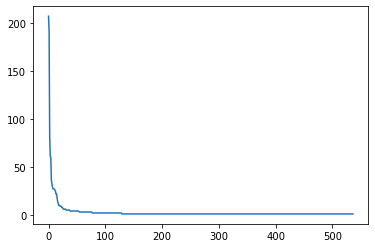

In [7]:
plt.plot(counts)

Most common ten frequencies

In [8]:
counts[:10]

(207, 191, 82, 61, 60, 36, 32, 29, 27, 27)

List all the unique sequence matches (in order from most to least common)

In [9]:
seqs

('Felis catus Senzu DNA, chromosome: E1, American Shorthair breed,',
 'PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904), rRNA,',
 'Homo sapiens lncAB371.6 lncRNA gene, complete sequence,',
 'Hirundo smithii voucher B-39509 external transcribed spacer, partial sequence; 18S ribosomal RNA gene, complete sequence; and internal transcribed spacer 1, partial sequence,',
 'Rhinolophus affinis mitochondrion, complete genome,',
 'PREDICTED: Tursiops truncatus 28S ribosomal RNA (LOC117310092), rRNA,',
 'PREDICTED: Marmota flaviventris 28S ribosomal RNA (LOC117794687), rRNA,',
 'Rhinolophus affinis voucher GZNU200310 16S ribosomal RNA gene, partial sequence; mitochondrial,',
 'PREDICTED: Phyllostomus discolor 28S ribosomal RNA (LOC114512504), rRNA,',
 'PREDICTED: Canis lupus familiaris 28S ribosomal RNA (LOC119880519), rRNA,',
 'Homo sapiens lncAB370.3 lncRNA gene, complete sequence,',
 'Danio rerio genome assembly, chromosome: 20,',
 'PREDICTED: Halichoerus grypus 28S ribosomal RNA (LOC

For SRR11085797, we see virtually no bacteria hits and large variation of species matched to raw sequence hits.

Percentage of human sequence matches in the raw reads

In [20]:
human = [x for x in titles if 'Human' in x]
homo_sapiens = [x for x in titles if 'Homo sapiens' in x]
print(f'Homo sapiens percentage: {((len(human)+len(homo_sapiens))/len(titles))*100}')

Homo sapiens percentage: 10.070671378091872


### Bat sequence content

Calculate percent of the following bat species and covs as percentage of the blast hits

In [11]:
bats=['Rhinolophus','Hipposideros', 'Bat', 'Pipistrellus', 'Pteropus']

In [12]:
bat_r = [x for x in titles if 'rhinolophus' in x.lower()]
bat_b = [x for x in titles if 'bat coronavirus' in x.lower()]
bat_p = [x for x in titles if 'pipistrellus' in x.lower()]
bat_h = [x for x in titles if 'hipposideros' in x.lower()]
bat_pt = [x for x in titles if 'Pteropus' in x.lower()]

In [13]:
bat_tot=len(bat_r)+len(bat_b)+len(bat_p)+len(bat_h)+len(bat_pt)
print(f'Bat percentage: {(bat_tot/len(titles))*100}')

Bat percentage: 22.614840989399294


### Synthetic and BAC clones

In [14]:
synthetic=[x for x in titles if 'synthetic' in x.lower()]
bac=[x for x in titles if ' bac ' in x.lower()]

In [18]:
len(synthetic), synthetic

(14,
 ['Eukaryotic synthetic construct chromosome 14 ,',
  'Eukaryotic synthetic construct chromosome 13 ,',
  'Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15,',
  'Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15,',
  'Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16,',
  'Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15,',
  'Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15,',
  'Eukaryotic synthetic construct chromosome 20 >gi|1549098600|gb|CP034524.1| Eukaryotic synthetic construct chromosome 20,',
  'Eukaryotic synthetic construct chromosome 15 >gi|1549096430|gb|CP034518.1| Eukaryotic synthetic construct chromosome 15,',
  'Eukary

In [19]:
len(bac), bac

(27,
 ["Rattus norvegicus 4 BAC CH230-209E1 (Children's Hospital Oakland Research Institute) complete sequence ,",
  'Homo sapiens clone BAC JH12 genomic sequence ,',
  'Pan troglodytes BAC clone CH251-433B9 from chromosome 6, complete sequence ,',
  'Pan troglodytes BAC clone RP43-165E11 from chromosome 7, complete sequence,',
  'Homo sapiens clone BAC JH12 genomic sequence,',
  'Homo sapiens 3 BAC RP11-505J9 (Roswell Park Cancer Institute Human BAC Library) complete sequence,',
  'Homo sapiens clone BAC JH12 genomic sequence,',
  'Mus musculus BAC clone RP23-168H19 from 10, complete sequence,',
  'Homo sapiens clone BAC JH12 genomic sequence,',
  'Homo sapiens clone BAC JH12 genomic sequence,',
  'Homo sapiens clone BAC JH12 genomic sequence,',
  'Homo sapiens clone BAC JH12 genomic sequence,',
  'Homo sapiens 3 BAC RP11-431I8 (Roswell Park Cancer Institute Human BAC Library) complete sequence,',
  'Ornithorhynchus anatinus BAC clone CH236-165F5 from chromosome unknown, complete sequ

NCBI Krona display of Taxonomy analysis shown below

https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR11085797
    
https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR11085797&krona=on&dataset=0&node=0&collapse=true&color=false&depth=11&font=11&key=true

![SRR11085797](figures/SRR11085797_Krona.png)

The species percentages we find from 1698 reads with 95% sequence hits differs somewhat from the NCBI SRA Taxonomy Anlaysis (STAT) shown above, potentially due to different methology used by STAT to Blastn and as we have only sampled a small percentage of the entire SRA dataset.